#### Importation des modules 

In [71]:
import sqlite3
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

#### connexion a la base de donnee avec sqlite3

In [72]:
connection = sqlite3.connect('euro-control-analyse-donnees-vols-aeroports/euro-control.db')
cursor = connection.cursor()

#### creation des tables

In [73]:
cursor.executescript("""
    DROP TABLE IF EXISTS aeroports;
    CREATE TABLE aeroports (
        id INTEGER PRIMARY KEY,
        nom TEXT,
        ville TEXT,
        pays TEXT,
        latitude REAL,
        longitude REAL  
    );

    DROP TABLE IF EXISTS companies;
    CREATE TABLE companies (
        id INTEGER PRIMARY KEY,
        nom TEXT,
        pays TEXT
    );

    DROP TABLE IF EXISTS vols;
    CREATE TABLE vols (
        id INTEGER PRIMARY KEY,
        date_depart DATETIME,
        date_arrivee DATETIME,
        aeroport_depart_id INTEGER,
        aeroport_arrivee_id INTEGER,
        companie_id INTEGER,
        distance REAL,
        FOREIGN KEY (aeroport_depart_id) REFERENCES aeroports(id),
        FOREIGN KEY (aeroport_arrivee_id) REFERENCES aeroports(id),
        FOREIGN KEY (companie_id) REFERENCES companies(id)
    );
""")

#### Insertion de données manuellement

In [74]:
cursor.executescript("""
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('CDG', 'Paris', 'France', 49.0128, 2.5501);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('LHR', 'Londres', 'Royaume-Uni', 51.4700, -0.4543);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('BRU', 'Bruxelles', 'Belgique', 50.9014, 4.4844);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('FRA', 'Francfort', 'Allemagne', 50.0333, 8.5706);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('AMS', 'Amsterdam', 'Pays-Bas', 52.3105, 4.7683);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('MAD', 'Madrid', 'Espagne', 40.4983, -3.5676);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('FCO', 'Rome', 'Italie', 41.8045, 12.2508);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('ZRH', 'Zurich', 'Suisse', 47.4647, 8.5492);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('VIE', 'Vienne', 'Autriche', 48.1103, 16.5697);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('CPH', 'Copenhague', 'Danemark', 55.6180, 12.6500);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('OSL', 'Oslo', 'Norvège', 60.1939, 11.1004);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('ARN', 'Stockholm', 'Suède', 59.6519, 17.9186);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('HEL', 'Helsinki', 'Finlande', 60.3172, 24.9633);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('DUB', 'Dublin', 'Irlande', 53.4213, -6.2701);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('LIS', 'Lisbonne', 'Portugal', 38.7813, -9.1359);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('ATH', 'Athènes', 'Grèce', 37.9364, 23.9445);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('IST', 'Istanbul', 'Turquie', 41.2753, 28.7519);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('PRG', 'Prague', 'Tchéquie', 50.1008, 14.2600);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('BUD', 'Budapest', 'Hongrie', 47.4369, 19.2556);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('WAW', 'Varsovie', 'Pologne', 52.1657, 20.9671);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('JFK', 'New York', 'États-Unis', 40.6413, -73.7781);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('LAX', 'Los Angeles', 'États-Unis', 33.9416, -118.4085);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('ORD', 'Chicago', 'États-Unis', 41.9742, -87.9073);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('YYZ', 'Toronto', 'Canada', 43.6777, -79.6248);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('YVR', 'Vancouver', 'Canada', 49.1939, -123.1840);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('MEX', 'Mexico', 'Mexique', 19.4363, -99.0721);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('GRU', 'São Paulo', 'Brésil', -23.4356, -46.4731);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('EZE', 'Buenos Aires', 'Argentine', -34.8222, -58.5358);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('SCL', 'Santiago', 'Chili', -33.3930, -70.7858);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('CPT', 'Le Cap', 'Afrique du Sud', -33.9648, 18.6017);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('JNB', 'Johannesburg', 'Afrique du Sud', -26.1337, 28.2421);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('CAI', 'Le Caire', 'Égypte', 30.1219, 31.4056);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('DXB', 'Dubaï', 'Émirats Arabes Unis', 25.2528, 55.3644);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('DOH', 'Doha', 'Qatar', 25.2611, 51.5651);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('DEL', 'Delhi', 'Inde', 28.5562, 77.1000);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('BOM', 'Mumbai', 'Inde', 19.0896, 72.8656);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('BKK', 'Bangkok', 'Thaïlande', 13.6811, 100.7471);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('SIN', 'Singapour', 'Singapour', 1.3644, 103.9915);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('HKG', 'Hong Kong', 'Hong Kong', 22.3080, 113.9185);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('NRT', 'Tokyo', 'Japon', 35.7647, 140.3863);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('ICN', 'Séoul', 'Corée du Sud', 37.4691, 126.4505);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('SYD', 'Sydney', 'Australie', -33.9461, 151.1772);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('MEL', 'Melbourne', 'Australie', -37.6733, 144.8433);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('AKL', 'Auckland', 'Nouvelle-Zélande', -37.0082, 174.7917);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('LGW', 'Londres-Gatwick', 'Royaume-Uni', 51.1481, -0.1903);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('MUC', 'Munich', 'Allemagne', 48.3538, 11.7861);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('BCN', 'Barcelone', 'Espagne', 41.2971, 2.0785);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('MXP', 'Milan', 'Italie', 45.6306, 8.7281);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('SVO', 'Moscou', 'Russie', 55.9726, 37.4146);
INSERT INTO Aeroports (nom, ville, pays, latitude, longitude) VALUES ('PEK', 'Pékin', 'Chine', 40.0801, 116.5846);

INSERT INTO Companies (nom, pays) VALUES ('Air France', 'France');
INSERT INTO Companies (nom, pays) VALUES ('Lufthansa', 'Allemagne');
INSERT INTO Companies (nom, pays) VALUES ('British Airways', 'Royaume-Uni');
INSERT INTO Companies (nom, pays) VALUES ('KLM', 'Pays-Bas');
INSERT INTO Companies (nom, pays) VALUES ('Iberia', 'Espagne');
INSERT INTO Companies (nom, pays) VALUES ('Alitalia', 'Italie');
INSERT INTO Companies (nom, pays) VALUES ('Swiss Air', 'Suisse');
INSERT INTO Companies (nom, pays) VALUES ('Austrian Airlines', 'Autriche');
INSERT INTO Companies (nom, pays) VALUES ('SAS', 'Suède');
INSERT INTO Companies (nom, pays) VALUES ('Finnair', 'Finlande');
INSERT INTO Companies (nom, pays) VALUES ('Aer Lingus', 'Irlande');
INSERT INTO Companies (nom, pays) VALUES ('TAP Portugal', 'Portugal');
INSERT INTO Companies (nom, pays) VALUES ('Aegean Airlines', 'Grèce');
INSERT INTO Companies (nom, pays) VALUES ('Turkish Airlines', 'Turquie');
INSERT INTO Companies (nom, pays) VALUES ('Delta Air Lines', 'États-Unis');
INSERT INTO Companies (nom, pays) VALUES ('United Airlines', 'États-Unis');
INSERT INTO Companies (nom, pays) VALUES ('American Airlines', 'États-Unis');
INSERT INTO Companies (nom, pays) VALUES ('Air Canada', 'Canada');
INSERT INTO Companies (nom, pays) VALUES ('LATAM Brasil', 'Brésil');
INSERT INTO Companies (nom, pays) VALUES ('Aerolineas Argentinas', 'Argentine');
INSERT INTO Companies (nom, pays) VALUES ('South African Airways', 'Afrique du Sud');
INSERT INTO Companies (nom, pays) VALUES ('EgyptAir', 'Égypte');
INSERT INTO Companies (nom, pays) VALUES ('Emirates', 'Émirats Arabes Unis');
INSERT INTO Companies (nom, pays) VALUES ('Qatar Airways', 'Qatar');
INSERT INTO Companies (nom, pays) VALUES ('Air India', 'Inde');
INSERT INTO Companies (nom, pays) VALUES ('Thai Airways', 'Thaïlande');
INSERT INTO Companies (nom, pays) VALUES ('Singapore Airlines', 'Singapour');
INSERT INTO Companies (nom, pays) VALUES ('Cathay Pacific', 'Hong Kong');
INSERT INTO Companies (nom, pays) VALUES ('ANA', 'Japon');
INSERT INTO Companies (nom, pays) VALUES ('Qantas', 'Australie');

INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (263, '2025-05-28 08:00:00', '2025-05-28 09:00:00', 1, 3, 1);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (344, '2025-05-28 09:00:00', '2025-05-28 10:30:00', 2, 1, 3);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (560, '2025-05-28 10:00:00', '2025-05-28 11:45:00', 1, 4, 1);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (312, '2025-05-28 11:00:00', '2025-05-28 12:15:00', 3, 5, 4);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (932, '2025-05-28 12:00:00', '2025-05-28 14:30:00', 4, 6, 2);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (1100, '2025-05-28 13:00:00', '2025-05-28 15:45:00', 5, 7, 6);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (450, '2025-05-28 14:00:00', '2025-05-28 15:20:00', 6, 8, 7);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (670, '2025-05-28 15:00:00', '2025-05-28 16:40:00', 7, 9, 8);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (320, '2025-05-28 16:00:00', '2025-05-28 17:10:00', 8, 10, 9);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (890, '2025-05-28 17:00:00', '2025-05-28 19:00:00', 9, 11, 10);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (1230, '2025-05-28 18:00:00', '2025-05-28 20:30:00', 10, 12, 9);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (1450, '2025-05-28 19:00:00', '2025-05-28 22:00:00', 11, 13, 10);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (560, '2025-05-28 20:00:00', '2025-05-28 21:45:00', 12, 14, 11);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (780, '2025-05-28 21:00:00', '2025-05-28 23:00:00', 13, 15, 12);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (2340, '2025-05-28 22:00:00', '2025-05-29 01:30:00', 14, 16, 13);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (1780, '2025-05-28 23:00:00', '2025-05-29 02:00:00', 15, 17, 14);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (890, '2025-05-29 06:00:00', '2025-05-29 08:00:00', 16, 18, 13);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (670, '2025-05-29 07:00:00', '2025-05-29 08:40:00', 17, 19, 14);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (560, '2025-05-29 08:00:00', '2025-05-29 09:45:00', 18, 20, 14);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (5560, '2025-05-29 09:00:00', '2025-05-29 16:00:00', 1, 21, 15);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (6780, '2025-05-29 10:00:00', '2025-05-29 18:00:00', 2, 22, 16);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (7890, '2025-05-29 11:00:00', '2025-05-29 20:00:00', 3, 23, 17);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (4500, '2025-05-29 12:00:00', '2025-05-29 17:30:00', 4, 24, 18);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (3900, '2025-05-29 13:00:00', '2025-05-29 18:00:00', 5, 25, 18);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (5600, '2025-05-29 14:00:00', '2025-05-29 21:00:00', 6, 26, 15);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (7800, '2025-05-29 15:00:00', '2025-05-30 00:00:00', 7, 27, 19);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (8900, '2025-05-29 16:00:00', '2025-05-30 02:00:00', 8, 28, 20);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (6700, '2025-05-29 17:00:00', '2025-05-30 01:00:00', 9, 29, 19);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (4500, '2025-05-29 18:00:00', '2025-05-29 23:30:00', 10, 30, 21);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (3400, '2025-05-29 19:00:00', '2025-05-30 00:00:00', 11, 31, 21);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (2300, '2025-05-29 20:00:00', '2025-05-29 23:00:00', 12, 32, 22);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (4500, '2025-05-29 21:00:00', '2025-05-30 02:30:00', 13, 33, 23);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (5600, '2025-05-29 22:00:00', '2025-05-30 05:00:00', 14, 34, 24);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (6700, '2025-05-29 23:00:00', '2025-05-30 07:00:00', 15, 35, 25);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (7800, '2025-05-30 06:00:00', '2025-05-30 14:00:00', 16, 36, 26);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (8900, '2025-05-30 07:00:00', '2025-05-30 16:00:00', 17, 37, 27);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (12300, '2025-05-30 08:00:00', '2025-05-30 20:00:00', 18, 38, 28);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (13400, '2025-05-30 09:00:00', '2025-05-30 22:00:00', 19, 39, 29);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (14500, '2025-05-30 10:00:00', '2025-05-31 00:00:00', 20, 40, 30);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (560, '2025-05-30 11:00:00', '2025-05-30 12:45:00', 21, 1, 15);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (780, '2025-05-30 12:00:00', '2025-05-30 14:00:00', 22, 2, 16);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (890, '2025-05-30 13:00:00', '2025-05-30 15:00:00', 23, 3, 17);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (1230, '2025-05-30 14:00:00', '2025-05-30 16:30:00', 24, 4, 18);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (1450, '2025-05-30 15:00:00', '2025-05-30 18:00:00', 25, 5, 18);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (2340, '2025-05-30 16:00:00', '2025-05-30 19:30:00', 26, 6, 15);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (1780, '2025-05-30 17:00:00', '2025-05-30 20:00:00', 27, 7, 19);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (890, '2025-05-30 18:00:00', '2025-05-30 20:00:00', 28, 8, 20);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (670, '2025-05-30 19:00:00', '2025-05-30 20:40:00', 29, 9, 19);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (450, '2025-05-30 20:00:00', '2025-05-30 21:15:00', 30, 10, 21);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (560, '2025-05-30 21:00:00', '2025-05-30 22:45:00', 31, 11, 21);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (780, '2025-05-30 22:00:00', '2025-05-31 00:00:00', 32, 12, 22);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (890, '2025-05-30 23:00:00', '2025-05-31 01:00:00', 33, 13, 23);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (1230, '2025-05-31 06:00:00', '2025-05-31 08:30:00', 34, 14, 24);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (1450, '2025-05-31 07:00:00', '2025-05-31 10:00:00', 35, 15, 25);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (2340, '2025-05-31 08:00:00', '2025-05-31 11:30:00', 36, 16, 26);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (1780, '2025-05-31 09:00:00', '2025-05-31 12:00:00', 37, 17, 27);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (890, '2025-05-31 10:00:00', '2025-05-31 12:00:00', 38, 18, 28);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (670, '2025-05-31 11:00:00', '2025-05-31 12:40:00', 39, 19, 29);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (450, '2025-05-31 12:00:00', '2025-05-31 13:15:00', 40, 20, 30);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (560, '2025-05-31 13:00:00', '2025-05-31 14:45:00', 41, 1, 1);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (780, '2025-05-31 14:00:00', '2025-05-31 16:00:00', 42, 2, 3);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (890, '2025-05-31 15:00:00', '2025-05-31 17:00:00', 43, 3, 3);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (1230, '2025-05-31 16:00:00', '2025-05-31 18:30:00', 44, 4, 4);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (1450, '2025-05-31 17:00:00', '2025-05-31 20:00:00', 45, 5, 4);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (2340, '2025-05-31 18:00:00', '2025-05-31 21:30:00', 46, 6, 6);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (1780, '2025-05-31 19:00:00', '2025-05-31 22:00:00', 47, 7, 6);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (890, '2025-05-31 20:00:00', '2025-05-31 22:00:00', 48, 8, 7);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (670, '2025-05-31 21:00:00', '2025-05-31 22:40:00', 49, 9, 7);
INSERT INTO Vols (distance, date_depart, date_arrivee, aeroport_depart_id, aeroport_arrivee_id, companie_id) VALUES (450, '2025-05-31 22:00:00', '2025-05-31 23:15:00', 50, 10, 8);
""")
connection.commit()

#### Requête 1 : Compter les vols par aéroport de départ

In [75]:
cursor.execute("""
    SELECT a.nom, COUNT(v.id) AS nombre_vols
    FROM aeroports a
    LEFT JOIN vols v ON a.id = v.aeroport_depart_id
    GROUP BY a.nom
    HAVING COUNT(v.id) > 0
    ORDER BY nombre_vols DESC
""")
resultat1 = cursor.fetchall()
print("Nombre de vols par aeroports de depart : ", resultat1)

Nombre de vols par aeroports de depart :  [('CDG', 3), ('ZRH', 2), ('VIE', 2), ('PRG', 2), ('OSL', 2), ('MAD', 2), ('LIS', 2), ('LHR', 2), ('IST', 2), ('HEL', 2), ('FRA', 2), ('FCO', 2), ('DUB', 2), ('CPH', 2), ('BRU', 2), ('ATH', 2), ('ARN', 2), ('AMS', 2), ('YYZ', 1), ('YVR', 1), ('WAW', 1), ('SYD', 1), ('SVO', 1), ('SIN', 1), ('SCL', 1), ('PEK', 1), ('ORD', 1), ('NRT', 1), ('MXP', 1), ('MUC', 1), ('MEX', 1), ('MEL', 1), ('LGW', 1), ('LAX', 1), ('JNB', 1), ('JFK', 1), ('ICN', 1), ('HKG', 1), ('GRU', 1), ('EZE', 1), ('DXB', 1), ('DOH', 1), ('DEL', 1), ('CPT', 1), ('CAI', 1), ('BUD', 1), ('BOM', 1), ('BKK', 1), ('BCN', 1), ('AKL', 1)]


#### Requête 2 : Créer une vue pour les vols de plus de 500 km

In [77]:
cursor.execute("""
    CREATE VIEW vue_vols_tres_longs AS
    SELECT a1.nom as depart, a2.nom as arrivee, v.distance
    FROM vols v
    JOIN aeroports a1 ON v.aeroport_depart_id = a1.id
    JOIN aeroports a2 ON v.aeroport_arrivee_id = a2.id
    WHERE v.distance > 500;
""")

#### Charger les résultats dans un DataFrame Pandas

In [78]:
df = pd.read_sql_query("SELECT * FROM vue_vols_tres_longs", connection)
print("Vols longs : \n")
df

Vols longs : 



,depart,arrivee,distance
0,CDG,FRA,560.0
1,FRA,MAD,932.0
2,AMS,FCO,1100.0
3,FCO,VIE,670.0
4,VIE,OSL,890.0
...,...,...,...
56,LGW,AMS,1450.0
57,MUC,MAD,2340.0
58,BCN,FCO,1780.0
59,MXP,ZRH,890.0


#### Affichier la liste des aeroports avec pandas (dans une dataFrame)

In [81]:
df = pd.read_sql_query("SELECT * FROM aeroports", connection)
df

,id,nom,ville,pays,latitude,longitude
0,1,CDG,Paris,France,49.0128,2.5501
1,2,LHR,Londres,Royaume-Uni,51.4700,-0.4543
2,3,BRU,Bruxelles,Belgique,50.9014,4.4844
3,4,FRA,Francfort,Allemagne,50.0333,8.5706
4,5,AMS,Amsterdam,Pays-Bas,52.3105,4.7683
5,6,MAD,Madrid,Espagne,40.4983,-3.5676
6,7,FCO,Rome,Italie,41.8045,12.2508
7,8,ZRH,Zurich,Suisse,47.4647,8.5492
8,9,VIE,Vienne,Autriche,48.1103,16.5697
9,10,CPH,Copenhague,Danemark,55.6180,12.6500


#### Cartographie avec Cartopy

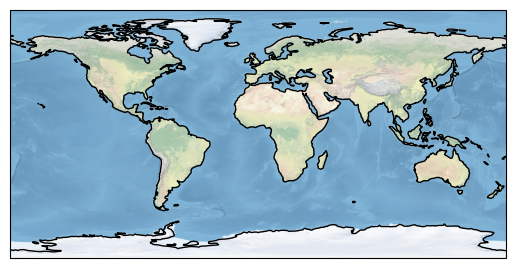

In [79]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()

#### Ajouter les aéroports sur la carte

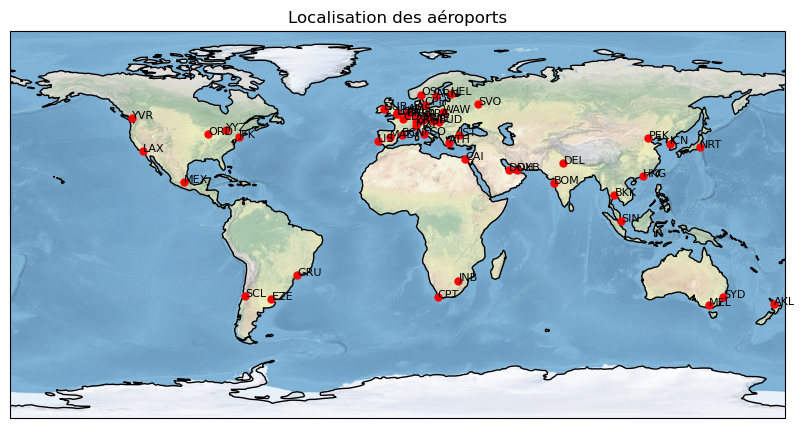

In [86]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()

cursor.execute("SELECT latitude, longitude, nom FROM aeroports")
aeroports = cursor.fetchall()
for lat, lon, nom in aeroports:
    ax.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
    ax.text(lon, lat, nom, transform=ccrs.PlateCarree(), fontsize=8)

plt.title("Localisation des aéroports")

plt.savefig('euro-control-analyse-donnees-vols-aeroports/euro_control_aeroports_map.png', dpi=300, bbox_inches='tight')

plt.show()

plt.close()

#### Fermer la connexion

In [ ]:
conn.close()